In [85]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
#*************************************************
#               DATOS DE UN SOLO ANO
#*************************************************
file_path = 'C:/Users/Stalyn33/Desktop/TEST PROYECTO/NY_COMPLETO/1243965_40.73_-74.02_2022.csv'
df_year = pd.read_csv(file_path, skiprows=2)

#*************************************************
#               TODOS LOS DATOS
#*************************************************
folder_path = 'C:/Users/Stalyn33/Desktop/TEST PROYECTO/NY_COMPLETO/'

# Obtener la lista de todos los archivos CSV en la carpeta
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Crear una lista para almacenar los DataFrames
df_list = []

# Leer y concatenar todos los archivos
for file in all_files:
    df_year = pd.read_csv(file, skiprows=2)
    df_list.append(df_year)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(df_list, ignore_index=True)
#*************************************************
#              CONFIGUACION EXHIBICION
#*************************************************
pd.set_option('display.max_columns', None)  # Puede ser: columns / rows
pd.reset_option('display.max_columns')

df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,1998,1,1,0,0,-9.6,0,0,0,0,...,0,76.93,162.29,0.06,1025,0.2,317,4.1,0.0,0.0
1,1998,1,1,0,30,-9.9,0,0,0,0,...,0,78.77,161.16,0.06,1025,0.2,317,4.1,0.0,0.0
2,1998,1,1,1,0,-10.2,0,0,0,0,...,0,77.76,158.19,0.06,1026,0.2,316,4.1,0.0,0.0
3,1998,1,1,1,30,-10.5,0,0,0,0,...,0,79.63,154.01,0.06,1026,0.2,315,4.1,0.0,0.0
4,1998,1,1,2,0,-10.7,0,0,0,0,...,0,78.82,149.13,0.06,1026,0.2,314,4.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438283,2022,12,31,21,30,8.7,0,0,0,7,...,0,99.59,144.06,0.08,1012,2.0,203,1.5,0.0,0.0
438284,2022,12,31,22,0,8.7,0,0,0,7,...,0,99.03,149.32,0.08,1012,2.1,208,1.4,0.0,0.0
438285,2022,12,31,22,30,8.7,0,0,0,8,...,0,99.03,154.18,0.08,1012,2.1,211,1.5,0.0,0.0
438286,2022,12,31,23,0,8.7,0,0,0,8,...,0,98.27,158.32,0.08,1012,2.1,215,1.6,0.0,0.0


In [87]:
# # Verificar si hay valores NaN en alguna columna
# nan_check = df.isnull().any()
# print("¿Hay valores NaN en alguna columna?\n", nan_check)

# # Opcional: Verificar cuántos valores NaN hay en cada columna
# nan_count = df.isnull().sum()
# print("\nCantidad de valores NaN por columna:\n", nan_count)

# # Ver los tipos de datos de cada columna
# print(df.dtypes)

In [88]:
# Convertir las columnas de Year, Month, Day, Hour y Minute a un formato de fecha y hora
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

# Eliminar las columnas originales
df.drop(columns=['Year', 'Month', 'Day', 'Hour', 'Minute'], inplace=True)

# Mover la columna 'Date' al inicio
cols = ['Date'] + [col for col in df.columns if col != 'Date']
df = df[cols]

# Mostrar el resultado
print(df.head())

                 Date  Temperature  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
0 1998-01-01 00:00:00         -9.6             0             0             0   
1 1998-01-01 00:30:00         -9.9             0             0             0   
2 1998-01-01 01:00:00        -10.2             0             0             0   
3 1998-01-01 01:30:00        -10.5             0             0             0   
4 1998-01-01 02:00:00        -10.7             0             0             0   

   Cloud Type  Dew Point  DHI  DNI  Fill Flag  GHI  Relative Humidity  \
0           0      -12.9    0    0          0    0              76.93   
1           0      -12.9    0    0          0    0              78.77   
2           0      -13.3    0    0          0    0              77.76   
3           0      -13.3    0    0          0    0              79.63   
4           0      -13.7    0    0          0    0              78.82   

   Solar Zenith Angle  Surface Albedo  Pressure  Precipitable Water  \
0        

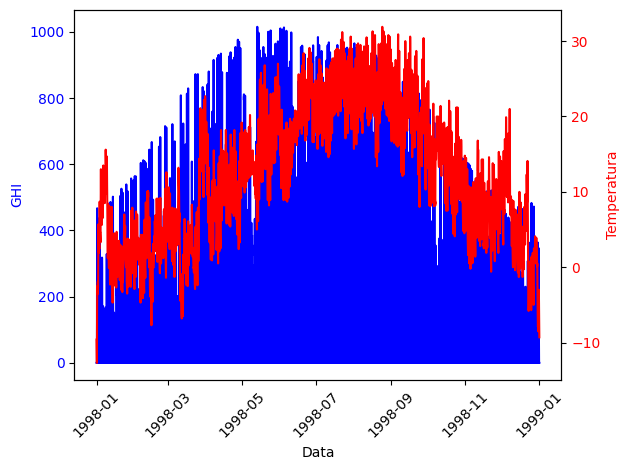

In [89]:
# Filtrar los datos entre las fechas deseadas
start_date = '1998-01-01 00:00:00'
end_date = '1998-12-31 23:30:00'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_filtered = df.loc[mask]

# Crear una figura y un eje
fig, ax1 = plt.subplots()

# Ploteamos GHI en el eje principal con los datos filtrados
ax1.plot(df_filtered['Date'], df_filtered['GHI'], color='b', label='GHI')
ax1.set_xlabel('Data')
ax1.set_ylabel('GHI', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje compartiendo el mismo eje x para la temperatura
ax2 = ax1.twinx()
ax2.plot(df_filtered['Date'], df_filtered['Temperature'], color='r', label='Temperature')
ax2.set_ylabel('Temperatura', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotar las etiquetas del eje X en el eje ax1
ax1.tick_params(axis='x', rotation=45)

# Ajustar el layout y mostrar el gráfico
fig.tight_layout()
plt.show()

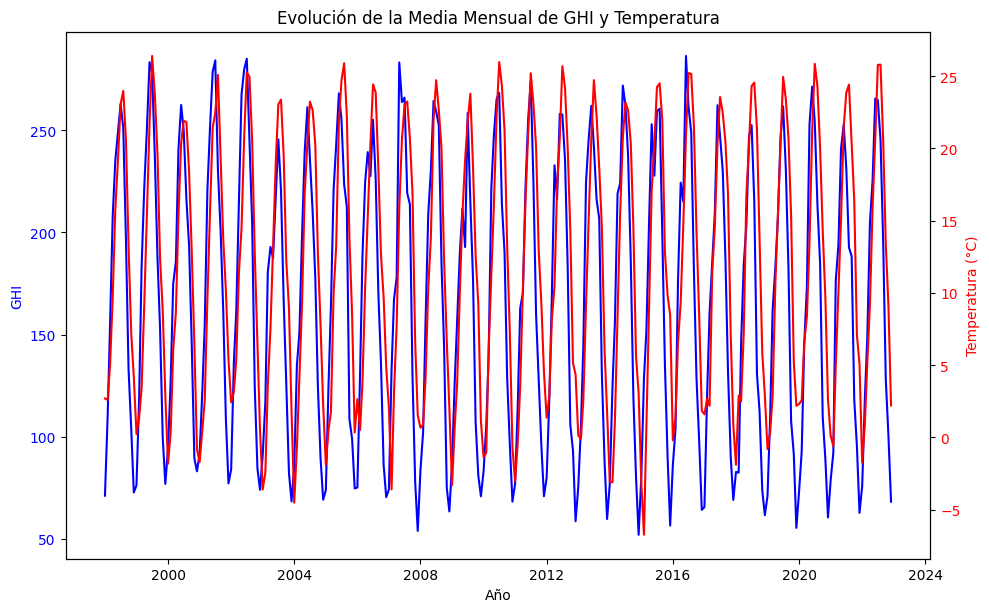

In [90]:
# Se creó una copia del DataFrame
df_T = df[['Date', 'GHI', 'Temperature']].copy()

# Agregar columnas de año y mes usando .loc
df_T.loc[:, 'Year'] = df_T['Date'].dt.year
df_T.loc[:, 'Month'] = df_T['Date'].dt.month

# Agrupar por año y mes, y calcular la media mensual para GHI y Temperatura
monthly_means = df_T.groupby(['Year', 'Month']).agg({'GHI': 'mean', 'Temperature': 'mean'}).reset_index()

# Crear una nueva columna 'YearMonth' para graficar correctamente
monthly_means['YearMonth'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(Day=1))

# Graficar la media mensual de GHI y Temperatura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Ploteamos la media mensual de GHI
ax1.plot(monthly_means['YearMonth'], monthly_means['GHI'], color='b', label='GHI Media Mensual')
ax1.set_xlabel('Año')
ax1.set_ylabel('GHI', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Crear un segundo eje Y para la temperatura
ax2 = ax1.twinx()
ax2.plot(monthly_means['YearMonth'], monthly_means['Temperature'], color='r', label='Temperatura Media Mensual')
ax2.set_ylabel('Temperatura (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Ajustar la rotación del eje X
plt.xticks(rotation=45)

# Ajustar el layout y mostrar el gráfico
fig.tight_layout()
plt.title('Evolución de la Media Mensual de GHI y Temperatura')
plt.show()

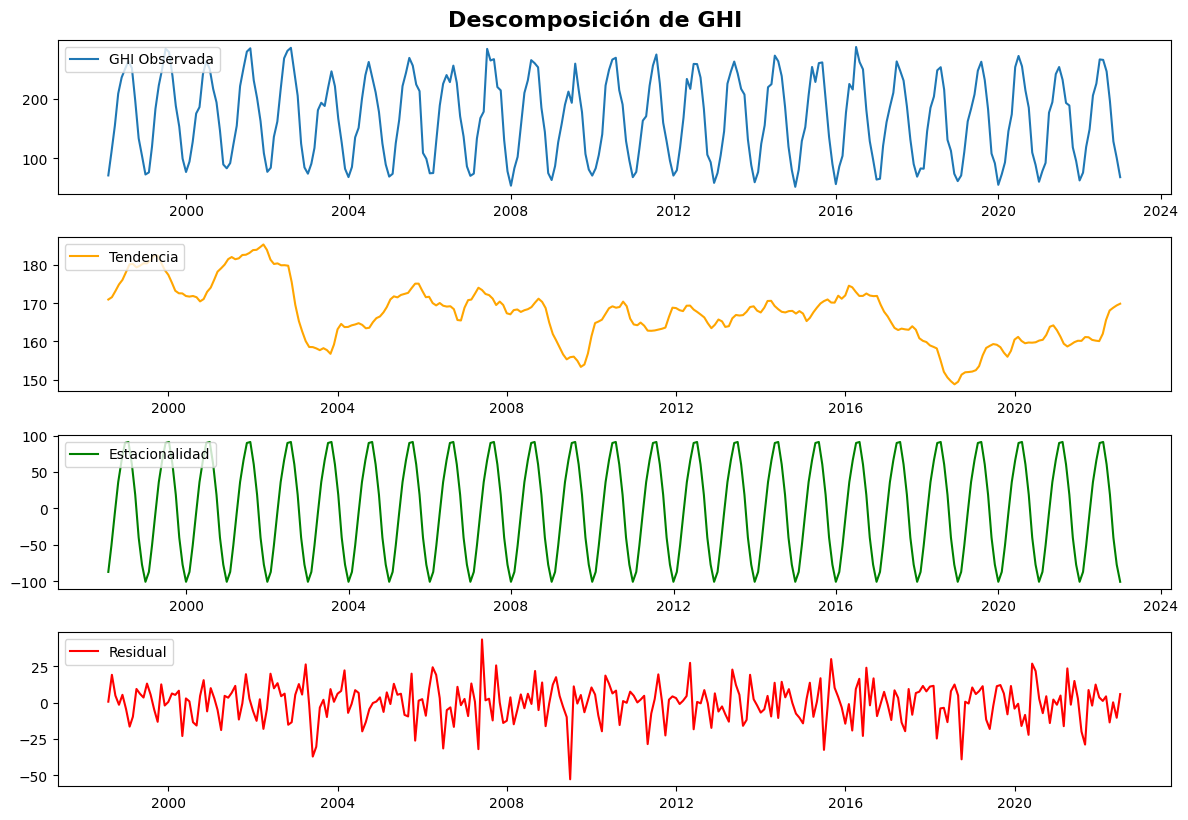

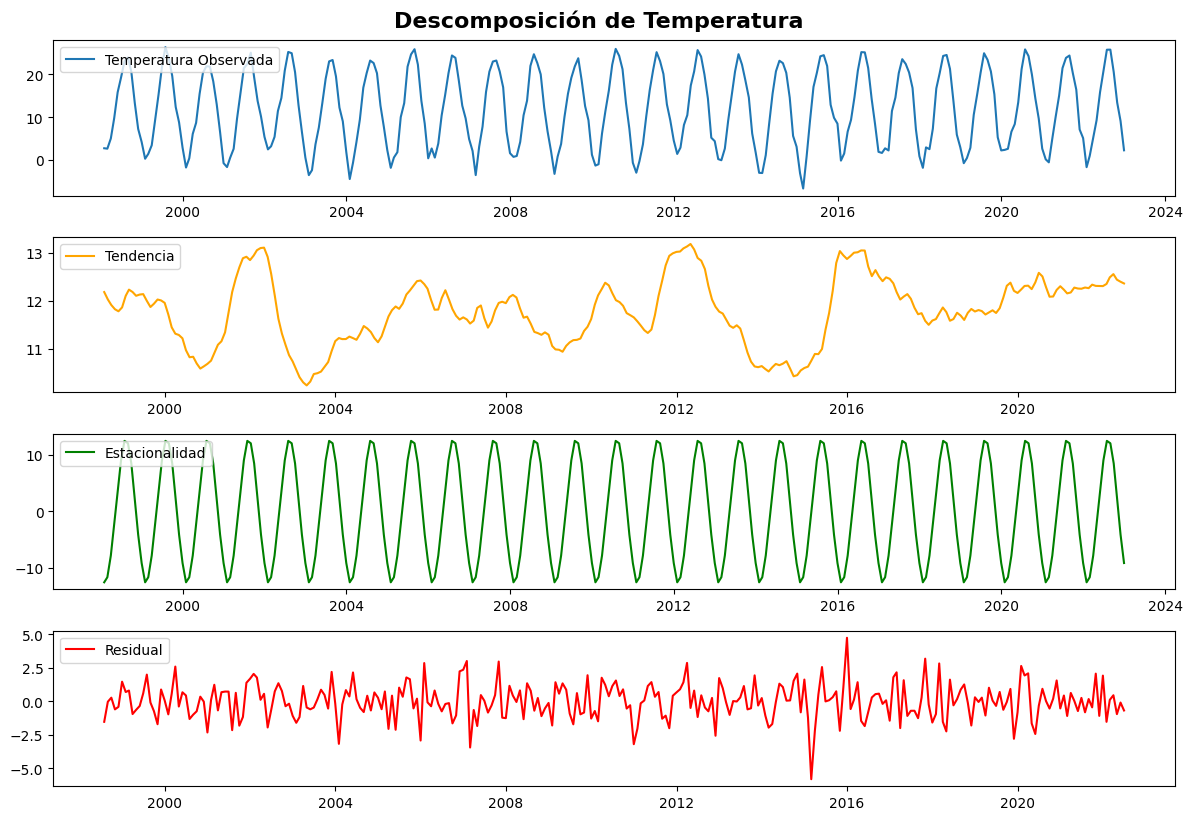

In [91]:
# Establecer la columna 'Date' como índice directamente
df_T_index = df_T.copy()
df_T_index.set_index('Date', inplace=True)

# Re-samplear los datos a una frecuencia diaria, tomando la media diaria de GHI y Temperatura
df_daily = df_T_index.resample('ME').mean()

# Descomposición de la serie temporal ajustando el periodo para años bisiestos
# El período puede ser aproximadamente 365.25 días para considerar años bisiestos
ghi_decomposed = seasonal_decompose(df_daily['GHI'], model='additive', period=int(12))
temp_decomposed = seasonal_decompose(df_daily['Temperature'], model='additive', period=int(12))

# Graficar los componentes para GHI
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(ghi_decomposed.observed, label='GHI Observada')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(ghi_decomposed.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(ghi_decomposed.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(ghi_decomposed.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.suptitle('Descomposición de GHI', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Graficar los componentes para Temperatura
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(temp_decomposed.observed, label='Temperatura Observada')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(temp_decomposed.trend, label='Tendencia', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(temp_decomposed.seasonal, label='Estacionalidad', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(temp_decomposed.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.tight_layout()
plt.suptitle('Descomposición de Temperatura', y=1.02, fontsize=16, fontweight='bold')
plt.show()

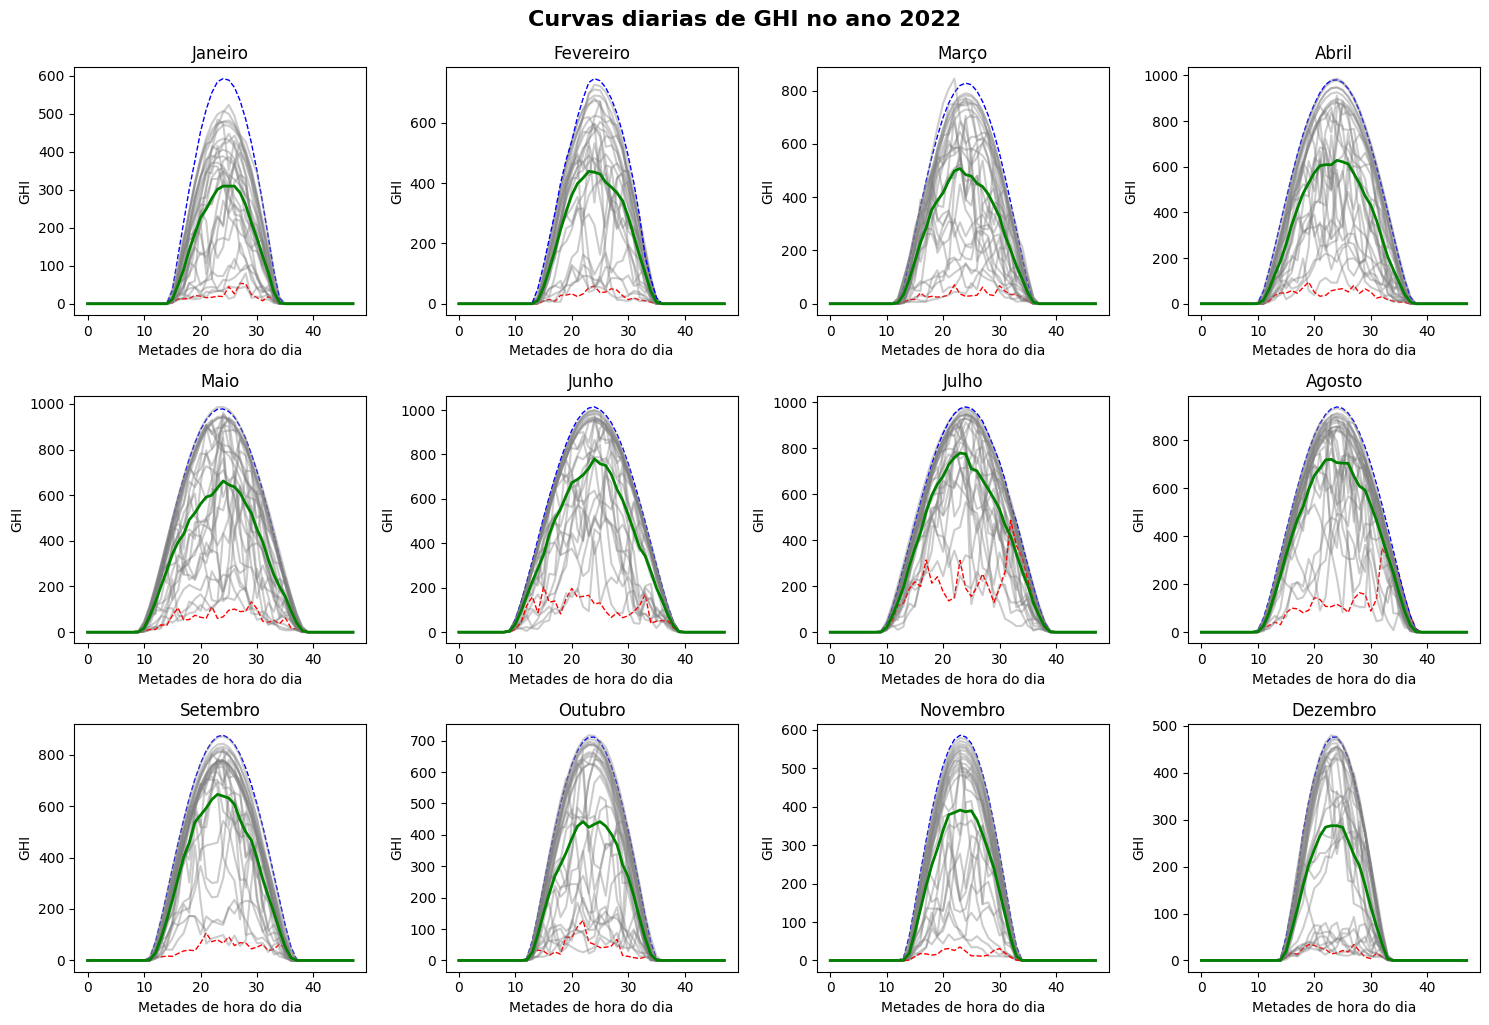

In [92]:
# Lista de meses en portugués
meses_portugues = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 
'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

# Función para graficar las curvas diarias de irradiancia (GHI o temperatura) para un año específico
def plot_yearly_ghi(year, columna):
    # Filtrar los datos para el año seleccionado
    df_year = df_T[df_T['Year'] == year]
    
    # Crear una figura con 12 subplots (uno para cada mes)
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    axes = axes.flatten()  # Aplanar los ejes para un manejo más fácil
    
    # Loop a través de los 12 meses
    for month in range(1, 13):
        # Filtrar los datos para el mes
        df_month = df_year[df_year['Month'] == month]
        
        # Crear un array de días en el mes
        days_in_month = df_month['Date'].dt.day.unique()
        
        # Crear un array para almacenar las curvas diarias y sus promedios
        daily_curves = []
        daily_means = []
        
        # Loop a través de cada día del mes
        for day in days_in_month:
            # Filtrar los datos para el día
            df_day = df_month[df_month['Date'].dt.day == day]
            
            # Añadir la curva diaria al array (GHI por hora o temperatura)
            daily_curve = df_day[columna].values
            daily_curves.append(daily_curve)
            
            # Calcular el promedio diario y almacenarlo
            daily_mean = np.mean(daily_curve)
            daily_means.append(daily_mean)
        
        # Convertir a arrays de numpy para manejo más fácil
        daily_curves = np.array(daily_curves)
        daily_means = np.array(daily_means)
        
        # Identificar los índices del día con el mayor y menor promedio
        max_index = np.argmax(daily_means)
        min_index = np.argmin(daily_means)
        
        # Plotear las curvas diarias en gris suave
        for i, curve in enumerate(daily_curves):
            if i == max_index:
                # Día con el mayor promedio (en azul)
                axes[month-1].plot(curve, color='blue', linewidth=1, linestyle='--')
            elif i == min_index:
                # Día con el menor promedio (en verde)
                axes[month-1].plot(curve, color='red', linewidth=1, linestyle='--')
            else:
                # Curvas diarias en gris suave
                axes[month-1].plot(curve, color='gray', alpha=0.4)

        # Calcular la media diaria de todo el mes y graficarla en rojo
        mean_curve = np.mean(daily_curves, axis=0)
        axes[month-1].plot(mean_curve, color='green', linewidth=2)
        
        # Título del subplot
        axes[month-1].set_title(f'{meses_portugues[month-1]}')
        axes[month-1].set_xlabel('Metades de hora do dia')
        axes[month-1].set_ylabel(columna)

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.suptitle(f'Curvas diarias de {columna} no ano {year}', y=1.02, fontsize=16, fontweight='bold')
    plt.show()

# Usar la función para graficar un año específico (por ejemplo, 2020 y la columna 'Temperature')
plot_yearly_ghi(2022, 'GHI')

In [93]:
#******************************
# VARIABLES DE PROYECTO PV
#******************************
NOCT = 42  # Temperatura nominal de operación de celdas (°C)
FT = 0.45  # Factor de temperatura (%/°C)
Eff_Nom = 21  # Eficiencia del módulo (%)
Ar = 1  # Área de cada módulo PV (m²)
Np = 5  # Número de paneles en la planta  
Pmax = (Eff_Nom / 100) * Ar * Np * 1000  # Potencia nominal del conversor para la planta (Wp)

# Se creó una copia del DataFrame
df_Gen = df[['Date', 'GHI', 'Temperature']].copy()

# Crear la nueva diferencia e temperatura STC y Real (Ya considera signo de la diferencia)
df_Gen['Delta_T'] =  25 - (df_Gen['Temperature'] + ((NOCT - 20) / 800) * df_Gen['GHI'])

# Calcular la Eficiencia real de los paneles solares
df_Gen['Eff_Real'] = Eff_Nom * (1 + (FT * df_Gen['Delta_T']) / 100)

# Crear la nueva columna P_PV, con valores mínimos de activación de 50 W/m² 
df_Gen['P_PV'] = np.where(df_Gen['GHI'] > 50, df_Gen['Eff_Real'] * Ar * Np * df_Gen['GHI'] / 100, 0)

# Crear la nueva columna P_Por, con el porcentaje de producción de energía en relación a Pmax 
df_Gen['P_Por'] = np.where(df_Gen['P_PV'] < (0.3 * Pmax) , (0.7 * df_Gen['P_PV'] / Pmax) + 0.765 , 0.975)

# Crear la nueva columna P_Gen, con valores de perdidas de conversor 
df_Gen['P_Gen'] = np.where(df_Gen['P_PV'] <= 0.3 * Pmax , ((0.7 * df_Gen['P_PV'] / Pmax) + 0.765) * df_Gen['P_PV'] , 
                           0.975 * df_Gen['P_PV'])

# Muestra las primeras 50 filas
df_Gen.iloc[:10]

,Date,GHI,Temperature,Delta_T,Eff_Real,P_PV,P_Por,P_Gen
0,1998-01-01 00:00:00,0,-9.6,34.6,24.26970,0.0,0.765,0.0
1,1998-01-01 00:30:00,0,-9.9,34.9,24.29805,0.0,0.765,0.0
2,1998-01-01 01:00:00,0,-10.2,35.2,24.32640,0.0,0.765,0.0
3,1998-01-01 01:30:00,0,-10.5,35.5,24.35475,0.0,0.765,0.0
4,1998-01-01 02:00:00,0,-10.7,35.7,24.37365,0.0,0.765,0.0
5,1998-01-01 02:30:00,0,-10.9,35.9,24.39255,0.0,0.765,0.0
6,1998-01-01 03:00:00,0,-11.1,36.1,24.41145,0.0,0.765,0.0
7,1998-01-01 03:30:00,0,-11.3,36.3,24.43035,0.0,0.765,0.0
8,1998-01-01 04:00:00,0,-11.5,36.5,24.44925,0.0,0.765,0.0
9,1998-01-01 04:30:00,0,-11.8,36.8,24.47760,0.0,0.765,0.0


In [94]:
max_valor_I = df_Gen['GHI'].max()
max_valor_P = df_Gen['P_Gen'].max()

print(f'El valor máximo de GHI encontrado fue de: {max_valor_I}')
print(f'El valor máximo de P_gen encontrado fue de: {max_valor_P}')
print('************************************************************')
print(f'La potencia nominal de la planta es de: {Pmax}')

El valor máximo de GHI encontrado fue de: 1022
El valor máximo de P_gen encontrado fue de: 968.92219344375
************************************************************
La potencia nominal de la planta es de: 1050.0


In [95]:
# Añade la columna 'Pmax' con el mismo valor en todas las filas
df_Gen['Pnom'] = Pmax

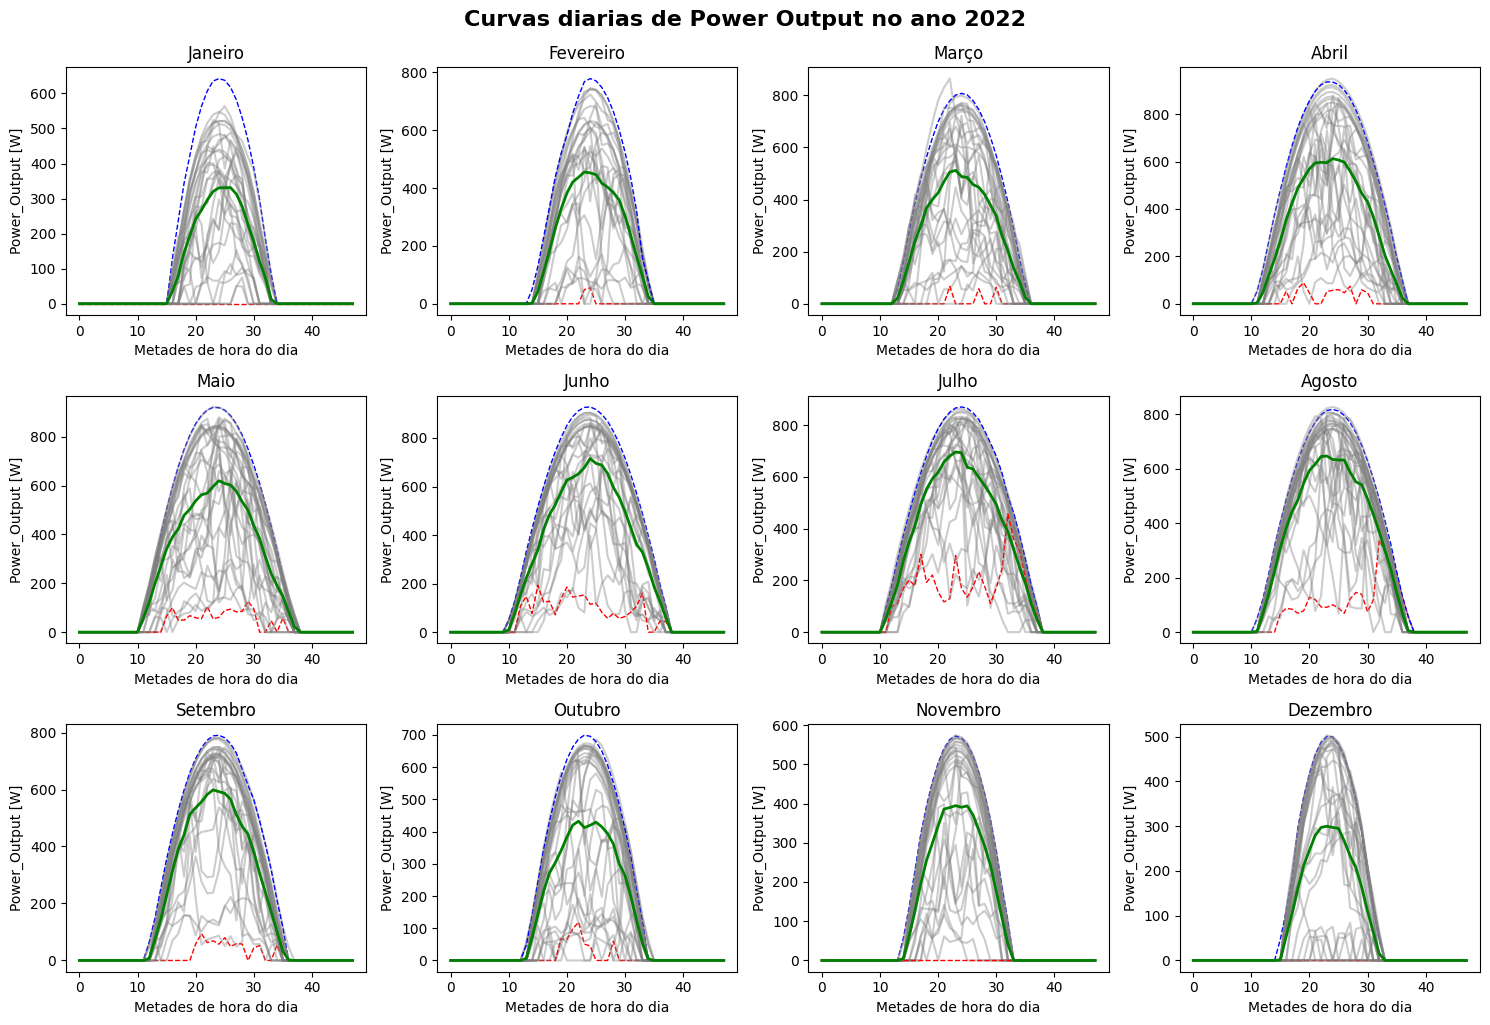

In [96]:
# Función para graficar las curvas diarias de 'Power_Output' para un año específico
def plot_yearly_power_output(year):
    # Filtrar los datos para el año seleccionado
    df_year = df_Gen[df_Gen['Date'].dt.year == year]
    
    # Crear una figura con 12 subplots (uno para cada mes)
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))
    axes = axes.flatten()  # Aplanar los ejes para un manejo más fácil
    
    # Loop a través de los 12 meses
    for month in range(1, 13):
        # Filtrar los datos para el mes
        df_month = df_year[df_year['Date'].dt.month == month]
        if df_month.empty:
            axes[month-1].set_title(f'{meses_portugues[month-1]} (Sin datos)')
            axes[month-1].axis('off')
            continue
        
        # Crear un array de días en el mes
        days_in_month = df_month['Date'].dt.day.unique()
        
        # Crear un array para almacenar las curvas diarias y sus promedios
        daily_curves = []
        daily_means = []
        
        # Loop a través de cada día del mes
        for day in days_in_month:
            # Filtrar los datos para el día
            df_day = df_month[df_month['Date'].dt.day == day]
            daily_curve = df_day['P_Gen'].values
            if daily_curve.size > 0:
                daily_curves.append(daily_curve)
                daily_means.append(np.mean(daily_curve))
        
        if daily_curves:
            daily_curves = np.array(daily_curves)
            daily_means = np.array(daily_means)
            
            # Identificar los índices del día con el mayor y menor promedio
            max_index = np.argmax(daily_means)
            min_index = np.argmin(daily_means)
            
            # Plotear las curvas diarias en gris suave
            for i, curve in enumerate(daily_curves):
                if i == max_index:
                    axes[month-1].plot(curve, color='blue', linewidth=1, linestyle='--')  # Máximo
                elif i == min_index:
                    axes[month-1].plot(curve, color='red', linewidth=1, linestyle='--')  # Mínimo
                else:
                    axes[month-1].plot(curve, color='gray', alpha=0.4)  # Otras curvas
            
            # Calcular y plotear la media diaria del mes
            mean_curve = np.mean(daily_curves, axis=0)
            axes[month-1].plot(mean_curve, color='green', linewidth=2)
        
        # Título del subplot
        axes[month-1].set_title(f'{meses_portugues[month-1]}')
        axes[month-1].set_xlabel('Metades de hora do dia')
        axes[month-1].set_ylabel('Power_Output [W]')

    # Ajustar el layout y mostrar el gráfico
    plt.tight_layout()
    plt.suptitle(f'Curvas diarias de Power Output no ano {year}', y=1.02, fontsize=16, fontweight='bold')
    plt.show()

# Usar la función para graficar un año específico
plot_yearly_power_output(2022)

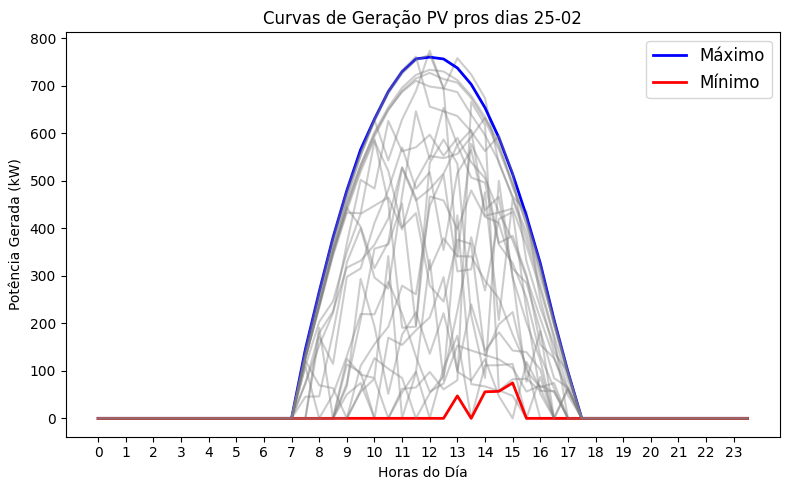

In [97]:
# Función para graficar las curvas diarias de 'Power_Output' para una fecha específica (día y mes)
def plot_daily_curves_by_date(dia_mes, columna='Power_Output'):
    # Filtrar los datos para la fecha seleccionada (día y mes)
    dia, mes = map(int, dia_mes.split('-'))
    df_filtered = df_Gen[(df_Gen['Date'].dt.month == mes) & (df_Gen['Date'].dt.day == dia)]
    
    # Crear una lista para almacenar las curvas diarias y sus promedios
    daily_curves = []
    daily_means = []
    
    # Obtener los años disponibles
    years = df_filtered['Date'].dt.year.unique()
    
    # Loop a través de cada año disponible
    for year in years:
        # Filtrar los datos para el año y el día específico
        df_day = df_filtered[df_filtered['Date'].dt.year == year]
        
        # Añadir la curva diaria al array (columna por hora)
        daily_curve = df_day[columna].values
        daily_curves.append(daily_curve)
        
        # Calcular el promedio diario y almacenarlo
        daily_mean = np.mean(daily_curve)
        daily_means.append(daily_mean)
    
    # Convertir a arrays de numpy para manejo más fácil
    daily_curves = np.array(daily_curves)
    daily_means = np.array(daily_means)
    
    # Identificar los índices del día con el mayor y menor promedio
    max_index = np.argmax(daily_means)
    min_index = np.argmin(daily_means)
    
    # Crear la figura para las curvas diarias
    plt.figure(figsize=(8, 5))
    
    # Plotear las curvas diarias en gris suave
    for i, curve in enumerate(daily_curves):
        if i == max_index:
            # Curva con el promedio más alto (en azul)
            plt.plot(curve, color='blue', linewidth=2, label='Máximo')
        elif i == min_index:
            # Curva con el promedio más bajo (en rojo)
            plt.plot(curve, color='red', linewidth=2, label='Mínimo')
        else:
            # Otras curvas en gris
            plt.plot(curve, color='gray', alpha=0.4)
            
    # Ajustar el eje X para mostrar solo las horas completas
    num_points = len(daily_curves[0])  # Número de puntos en cada curva (48 puntos para medias horas)
    plt.xticks(ticks=np.arange(0, num_points, 2), labels=np.arange(0, 24, 1))
    
    # Títulos y etiquetas
    plt.title(f'Curvas de Geração PV pros dias {dia_mes}')
    plt.xlabel('Horas do Día')
    plt.ylabel('Potência Gerada (kW)')
    plt.legend(loc='upper right', fontsize=12)
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Usar la función para graficar una fecha específica (por ejemplo, 02-05 para el 2 de mayo)
plot_daily_curves_by_date('25-02', 'P_Gen')

In [98]:
# Exportar el DataFrame a un archivo CSV en la misma carpeta
df_Gen.to_csv('PV_NY.csv', index=False)